In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

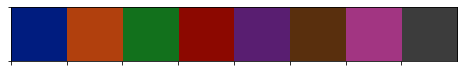

In [2]:
sns.palplot(sns.color_palette("dark", 8))
sns.set(font_scale=1.2)
# sns.set_style("whitegrid")
sns.set_style("white")

In [19]:
# import flights results
flights_accuracy_range = pd.read_csv('flights_accuracy_range.csv')
flights_accuracy_tfdv = pd.read_csv('flights_accuracy_tfdv.csv')
flights_accuracy_baseline = pd.read_csv('flights_accuracy_baseline.csv')

In [20]:
# import fb results
fb_accuracy_range = pd.read_csv('fb_accuracy_range.csv')
fb_accuracy_tfdv = pd.read_csv('fb_accuracy_tfdv.csv')
fb_accuracy_baseline = pd.read_csv('fb_accuracy_baseline.csv')

In [21]:
flights_acc = pd.merge(flights_accuracy_baseline, flights_accuracy_tfdv, how='outer', on = ['train_type', 'batch_size'], suffixes=('_baseline', '_tfdv'))
flights_acc = pd.merge(flights_acc, flights_accuracy_range, how='outer', on = ['train_type', 'batch_size'])
flights_acc.rename(columns = {'accuracy':'accuracy_range'}, inplace = True) 

In [22]:
flights_acc

,train_type,batch_size,accuracy_baseline,accuracy_tfdv,accuracy_range
0,increasing,1,0.883333,0.933333,0.950000
1,increasing,2,0.896552,0.948276,0.965517
2,increasing,3,0.892857,0.964286,0.982143
3,increasing,4,0.907407,0.981481,0.981481
4,increasing,5,0.903846,1.000000,0.980769
5,increasing,6,0.900000,1.000000,0.980000
6,increasing,7,0.916667,1.000000,0.979167
7,increasing,8,0.934783,1.000000,0.978261
8,increasing,9,0.954545,1.000000,0.977273
9,rolling,1,0.500000,0.500000,0.500000


In [23]:
fb_acc = pd.merge(fb_accuracy_baseline, fb_accuracy_tfdv, how='outer', on = ['train_type', 'batch_size'], suffixes=('_baseline', '_tfdv'))
fb_acc = pd.merge(fb_acc, fb_accuracy_range, how='outer', on = ['train_type', 'batch_size'])
fb_acc.rename(columns = {'accuracy':'accuracy_range'}, inplace = True) 

In [24]:
fb_acc

,train_type,batch_size,accuracy_baseline,accuracy_tfdv,accuracy_range
0,increasing,1,0.942308,0.480769,0.990385
1,increasing,2,0.950980,0.480392,1.000000
2,increasing,3,0.960000,0.480000,1.000000
3,increasing,4,0.969388,0.479592,1.000000
4,increasing,5,0.968750,0.479167,1.000000
5,increasing,6,0.968085,0.478723,1.000000
6,increasing,7,0.967391,0.478261,1.000000
7,increasing,8,0.966667,0.477778,1.000000
8,increasing,9,0.977273,0.477273,1.000000
9,rolling,1,0.500000,0.500000,0.500000


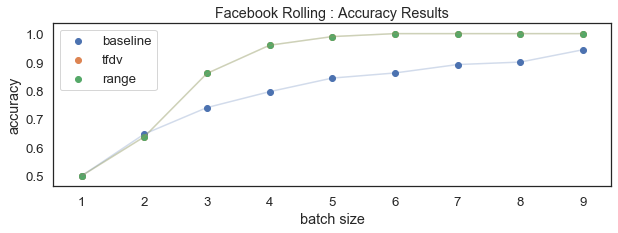

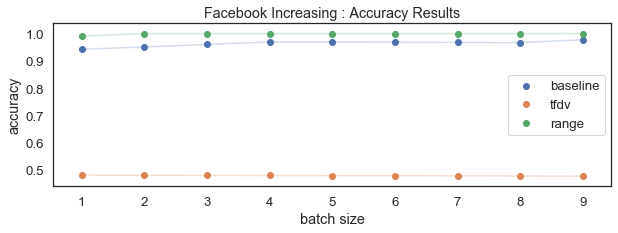

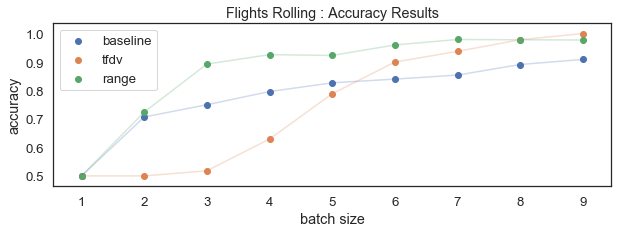

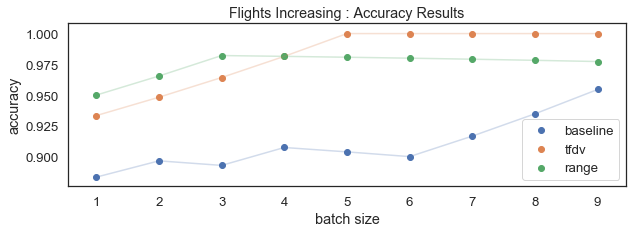

In [25]:
titles = ['Facebook', 'Flights']
accuracy_dfs = [fb_acc, flights_acc]
train_types = ['rolling', 'increasing']
for i in range(2):
    data = accuracy_dfs[i]
    for traintype in train_types:
        df = data[data.train_type == traintype]
        plt.figure(figsize =(10, 3))
        plt.title('%s %s : Accuracy Results' %(titles[i], traintype.title()))
        plt.xlabel('batch size')
        plt.ylabel('accuracy')
        plt.plot(df.batch_size, df.accuracy_baseline, label = '_nolegend_', alpha = .25)
        plt.scatter(df.batch_size, df.accuracy_baseline, label = 'baseline')
        plt.plot(df.batch_size, df.accuracy_tfdv, label = '_nolegend_', alpha = .25)
        plt.scatter(df.batch_size, df.accuracy_tfdv, label = 'tfdv')
        plt.plot(df.batch_size, df.accuracy_range, label = '_nolegend_', alpha = .25)
        plt.scatter(df.batch_size, df.accuracy_range, label = 'range')
        plt.legend()
        plt.show()